In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
path = os.path.join(os.getcwd(), os.pardir)
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# Central Limit Theorem

In [3]:
Q_avg = np.array([np.random.normal(0, 1, 100).mean() for i in range(100000)])

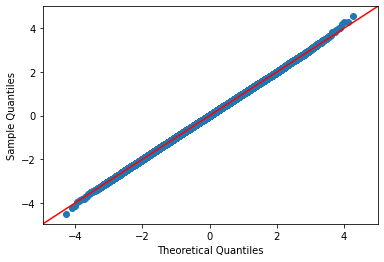

In [4]:
sm.qqplot(Q_avg * np.sqrt(100), line ='45')
py.show()

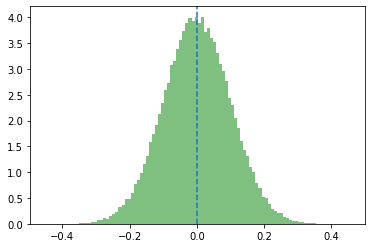

In [5]:
plt.hist(Q_avg, 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=Q_avg.mean(), linestyle='--');

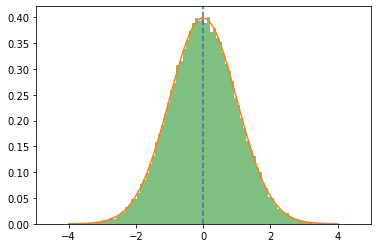

In [6]:
plt.hist(Q_avg * np.sqrt(100), 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=(Q_avg * np.sqrt(100)).mean(), linestyle='--')
plt.plot(np.arange(-4, 4, 0.001), norm.pdf(np.arange(-4, 4, 0.001), 0, 1))

# Biased Downward Phenomenon - Sample Mean

In [7]:
T = 10000

N_A = []
N_B = []
VAR_A = []
VAR_B = []
Q_avg_A = []
Q_avg_B = []

for i in range(100000):
    R1_A = np.random.normal(0, 1, int(0.5 * T/2))
    R1_B = np.random.normal(0, 1, int(0.5 * T/2))
    R2_W1 = np.random.normal(0, 1, int(0.9 * T/2))
    R2_L1 = np.random.normal(0, 1, int(0.1 * T/2))
    if R1_A.mean() > R1_B.mean():
        each_N_A = int(0.5 * T/2) + int(0.9 * T/2)
        each_N_B = int(0.5 * T/2) + int(0.1 * T/2)
        each_Q_avg_A = (R1_A.sum() + R2_W1.sum()) / each_N_A
        each_Q_avg_B = (R1_B.sum() + R2_L1.sum()) / each_N_B
    else:
        each_N_A = int(0.5 * T/2) + int(0.1 * T/2)
        each_N_B = int(0.5 * T/2) + int(0.9 * T/2)
        each_Q_avg_A = (R1_A.sum() + R2_L1.sum()) / each_N_A
        each_Q_avg_B = (R1_B.sum() + R2_W1.sum()) / each_N_B
    each_VAR_A = 1 / each_N_A
    each_VAR_B = 1 / each_N_B
    VAR_A.append(each_VAR_A)
    VAR_B.append(each_VAR_B)
    Q_avg_A.append(each_Q_avg_A)
    Q_avg_B.append(each_Q_avg_B)
    N_A.append(each_N_A)
    N_B.append(each_N_B)
N_A = np.array(N_A)
N_B = np.array(N_B)
VAR_A = np.array(VAR_A)
VAR_B = np.array(VAR_B)
Q_avg_A = np.array(Q_avg_A)
Q_avg_B = np.array(Q_avg_B)

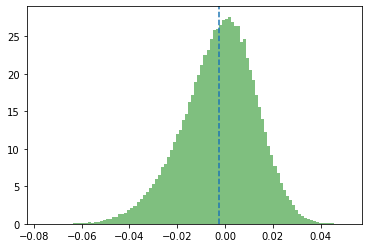

In [8]:
plt.hist(Q_avg_A, 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=Q_avg_A.mean(), linestyle='--');

In [9]:
plt.hist(Q_avg_A * np.sqrt(N_A), 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=(Q_avg_A * np.sqrt(N_A)).mean(), linestyle='--');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), 0, 1), color='black');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), (Q_avg_A * np.sqrt(N_A)).mean(), (Q_avg_A * np.sqrt(N_A)).std()), color='blue');

# the bias is a direct consequence of the outcome-adaptive data collection

In [10]:
T = 10000

N_A = []
N_B = []
Q_avg_A = []
Q_avg_B = []

for i in range(100000):
    R1_A = np.random.normal(0, 1, int(0.5 * T/2))
    R1_B = np.random.normal(0, 1, int(0.5 * T/2))
    R2_W1 = np.random.normal(0, 1, int(0.9 * T/2))
    R2_L1 = np.random.normal(0, 1, int(0.1 * T/2))
    each_N_A = int(0.5 * T/2) + int(0.9 * T/2)
    each_N_B = int(0.5 * T/2) + int(0.1 * T/2)
    avg_A = (R1_A.sum() + R2_W1.sum()) / each_N_A
    avg_B = (R1_B.sum() + R2_L1.sum()) / each_N_B
    N_A.append(each_N_A)
    N_B.append(each_N_B)
    Q_avg_A.append(avg_A)
    Q_avg_B.append(avg_B)
N_A = np.array(N_A)
N_B = np.array(N_B)
Q_avg_A = np.array(Q_avg_A)
Q_avg_B = np.array(Q_avg_B)

In [11]:
plt.hist(Q_avg_A, 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=Q_avg_A.mean(), linestyle='--');

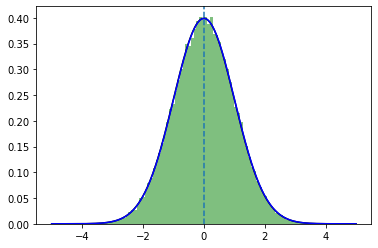

In [12]:
plt.hist(Q_avg_A * np.sqrt(N_A), 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=(Q_avg_A * np.sqrt(N_A)).mean(), linestyle='--');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), 0, 1), color='black');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), (Q_avg_A * np.sqrt(N_A)).mean(), (Q_avg_A * np.sqrt(N_A)).std()), color='blue');

# Biased Downward Phenomenon - IPW Mean

In [13]:
T = 10000

N_A = []
N_B = []
VAR_A = []
VAR_B = []
Q_avg_A = []
Q_avg_B = []

for i in range(100000):
    R1_A = np.random.normal(0, 1, int(0.5 * T/2))
    R1_B = np.random.normal(0, 1, int(0.5 * T/2))
    R2_W1 = np.random.normal(0, 1, int(0.9 * T/2))
    R2_L1 = np.random.normal(0, 1, int(0.1 * T/2))
    if R1_A.mean() > R1_B.mean():
        each_N_A = int(0.5 * T/2) + int(0.9 * T/2)
        each_N_B = int(0.5 * T/2) + int(0.1 * T/2)
        each_Q_avg_A = ((R1_A / 0.5).sum() + (R2_W1 / 0.9).sum()) / T
        each_Q_avg_B = ((R1_B / 0.5).sum() + (R2_L1 / 0.1).sum()) / T
        each_SS_A = ((R1_A / 0.5)**2).sum() + ((R2_W1 / 0.9)**2).sum()
        each_SS_B = ((R1_B / 0.5)**2).sum() + ((R2_L1 / 0.1)**2).sum()
        each_VAR_A = (each_SS_A / T - each_Q_avg_A ** 2) / T
        each_VAR_B = (each_SS_B / T - each_Q_avg_B ** 2) / T
    else:
        each_N_A = int(0.5 * T/2) + int(0.1 * T/2)
        each_N_B = int(0.5 * T/2) + int(0.9 * T/2)
        each_Q_avg_A = ((R1_A / 0.5).sum() + (R2_L1 / 0.1).sum()) / T
        each_Q_avg_B = ((R1_B / 0.5).sum() + (R2_W1 / 0.9).sum()) / T
        each_SS_A = ((R1_A / 0.5)**2).sum() + ((R2_L1 / 0.1)**2).sum()
        each_SS_B = ((R1_B / 0.5)**2).sum() + ((R2_W1 / 0.9)**2).sum()
        each_VAR_A = (each_SS_A / T - each_Q_avg_A ** 2) / T
        each_VAR_B = (each_SS_B / T - each_Q_avg_B ** 2) / T
    VAR_A.append(each_VAR_A)
    VAR_B.append(each_VAR_B)
    Q_avg_A.append(each_Q_avg_A)
    Q_avg_B.append(each_Q_avg_B)
    N_A.append(each_N_A)
    N_B.append(each_N_B)
N_A = np.array(N_A)
N_B = np.array(N_B)
VAR_A = np.array(VAR_A)
VAR_B = np.array(VAR_B)
Q_avg_A = np.array(Q_avg_A)
Q_avg_B = np.array(Q_avg_B)

In [14]:
plt.hist(Q_avg_A, 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=Q_avg_A.mean(), linestyle='--');

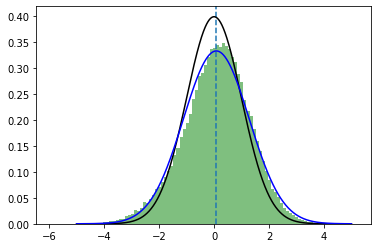

In [15]:
plt.hist(Q_avg_A * np.sqrt(N_A), 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=(Q_avg_A * np.sqrt(N_A)).mean(), linestyle='--');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), 0, 1), color='black');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), (Q_avg_A * np.sqrt(N_A)).mean(), (Q_avg_A * np.sqrt(N_A)).std()), color='blue');

In [16]:
plt.hist(Q_avg_A / np.sqrt(VAR_A), 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=(Q_avg_A / np.sqrt(VAR_A)).mean(), linestyle='--');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), 0, 1), color='black');
plt.plot(np.arange(-6, 6, 0.001), norm.pdf(np.arange(-6, 6, 0.001), (Q_avg_A / np.sqrt(VAR_A)).mean(), (Q_avg_A / np.sqrt(VAR_A)).std()), color='blue');

In [17]:
np.mean(VAR_A)

0.00037755714448137965

In [18]:
T = 10000

N_A = []
N_B = []
VAR_A = []
VAR_B = []
Q_avg_A = []
Q_avg_B = []

for i in range(100000):
    R1_A = np.random.normal(0, 1, int(0.5 * T/2))
    R1_B = np.random.normal(0, 1, int(0.5 * T/2))
    R2_W1 = np.random.normal(0, 1, int(0.9 * T/2))
    R2_L1 = np.random.normal(0, 1, int(0.1 * T/2))
    if R1_A.mean() > R1_B.mean():
        each_N_A = int(0.5 * T/2) + int(0.9 * T/2)
        each_N_B = int(0.5 * T/2) + int(0.1 * T/2)
        each_Q_avg_A = (R1_A.sum() / np.sqrt(int(0.5 * T/2)) + R2_W1.sum() / np.sqrt(int(0.9 * T/2))) / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.9 * T/2)))
        each_Q_avg_B = (R1_B.sum() / np.sqrt(int(0.5 * T/2)) + R2_L1.sum() / np.sqrt(int(0.1 * T/2))) / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.1 * T/2)))
        each_VAR_A = 2 * 1 / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.9 * T/2))) ** 2
        each_VAR_B = 2 * 1 / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.1 * T/2))) ** 2
    else:
        each_N_A = int(0.5 * T/2) + int(0.1 * T/2)
        each_N_B = int(0.5 * T/2) + int(0.9 * T/2)
        each_Q_avg_A = (R1_A.sum() / np.sqrt(int(0.5 * T/2)) + R2_L1.sum() / np.sqrt(int(0.1 * T/2))) / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.1 * T/2)))
        each_Q_avg_B = (R1_B.sum() / np.sqrt(int(0.5 * T/2)) + R2_W1.sum() / np.sqrt(int(0.9 * T/2))) / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.9 * T/2)))
        each_VAR_A = 2 * 1 / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.1 * T/2))) ** 2
        each_VAR_B = 2 * 1 / (np.sqrt(int(0.5 * T/2)) + np.sqrt(int(0.9 * T/2))) ** 2
    VAR_A.append(each_VAR_A)
    VAR_B.append(each_VAR_B)
    Q_avg_A.append(each_Q_avg_A)
    Q_avg_B.append(each_Q_avg_B)
    N_A.append(each_N_A)
    N_B.append(each_N_B)
N_A = np.array(N_A)
N_B = np.array(N_B)
VAR_A = np.array(VAR_A)
VAR_B = np.array(VAR_B)
Q_avg_A = np.array(Q_avg_A)
Q_avg_B = np.array(Q_avg_B)

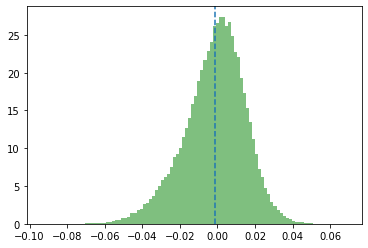

In [19]:
plt.hist(Q_avg_A, 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=Q_avg_A.mean(), linestyle='--');

In [20]:
plt.hist(Q_avg_A * np.sqrt(N_A), 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=(Q_avg_A * np.sqrt(N_A)).mean(), linestyle='--');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), 0, 1), color='black');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), (Q_avg_A * np.sqrt(N_A)).mean(), (Q_avg_A * np.sqrt(N_A)).std()), color='blue');

In [21]:
plt.hist(Q_avg_A / np.sqrt(VAR_A), 100, density=True, facecolor='green', alpha=0.5);
plt.axvline(x=(Q_avg_A / np.sqrt(VAR_A)).mean(), linestyle='--');
plt.plot(np.arange(-5, 5, 0.001), norm.pdf(np.arange(-5, 5, 0.001), 0, 1), color='black');
plt.plot(np.arange(-6, 6, 0.001), norm.pdf(np.arange(-6, 6, 0.001), (Q_avg_A / np.sqrt(VAR_A)).mean(), (Q_avg_A / np.sqrt(VAR_A)).std()), color='blue');

In [22]:
np.mean(VAR_A)

0.00026459065215743465